In [34]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
from preprocessing_utils import process_tweet,build_freqs

In [23]:
all_positive_tweets=twitter_samples.strings("positive_tweets.json")
all_negative_tweets=twitter_samples.strings("negative_tweets.json")
tweets=all_negative_tweets+all_positive_tweets

#### create an array of 1's and 0's

In [24]:
labels=np.append(np.ones((len(all_positive_tweets))),np.zeros((len(all_negative_tweets))))

#### word frequency dictionary

In [25]:
def build_freq(tweets,ys):
    freqs={}
    yslist=np.squeeze(ys).tolist()
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [35]:
freqs = build_freqs(tweets, labels)
len(freqs)

13171

In [36]:
freqs

{('hopeless', 1.0): 2,
 ('tmr', 1.0): 3,
 (':(', 1.0): 4584,
 ('everyth', 1.0): 17,
 ('kid', 1.0): 20,
 ('section', 1.0): 3,
 ('ikea', 1.0): 1,
 ('cute', 1.0): 43,
 ('shame', 1.0): 19,
 ("i'm", 1.0): 343,
 ('nearli', 1.0): 3,
 ('19', 1.0): 8,
 ('2', 1.0): 41,
 ('month', 1.0): 23,
 ('heart', 1.0): 27,
 ('slide', 1.0): 1,
 ('wast', 1.0): 5,
 ('basket', 1.0): 1,
 ('“', 1.0): 15,
 ('hate', 1.0): 57,
 ('japanes', 1.0): 4,
 ('call', 1.0): 29,
 ('bani', 1.0): 2,
 ('”', 1.0): 11,
 ('dang', 1.0): 2,
 ('start', 1.0): 44,
 ('next', 1.0): 40,
 ('week', 1.0): 56,
 ('work', 1.0): 133,
 ('oh', 1.0): 92,
 ('god', 1.0): 15,
 ('babi', 1.0): 47,
 ('face', 1.0): 20,
 ('make', 1.0): 102,
 ('smile', 1.0): 10,
 ('neighbour', 1.0): 1,
 ('motor', 1.0): 1,
 ('ask', 1.0): 29,
 ('said', 1.0): 33,
 ('updat', 1.0): 11,
 ('search', 1.0): 3,
 ('sialan', 1.0): 1,
 ('athabasca', 1.0): 2,
 ('glacier', 1.0): 2,
 ('1948', 1.0): 1,
 (':-(', 1.0): 501,
 ('jasper', 1.0): 1,
 ('jaspernationalpark', 1.0): 1,
 ('alberta', 1.0):

#### tabel of word count

In [39]:
# preprocessed
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data=[]
for word in keys:
    pos=0
    neg=0
    if (word,1) in freqs:
        pos = freqs[(word, 1)]
    if (word,0) in freqs:
        neg = freqs[(word, 0)]
    data.append([word, pos, neg])
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/home/nathanael/Desktop/build/nlp/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


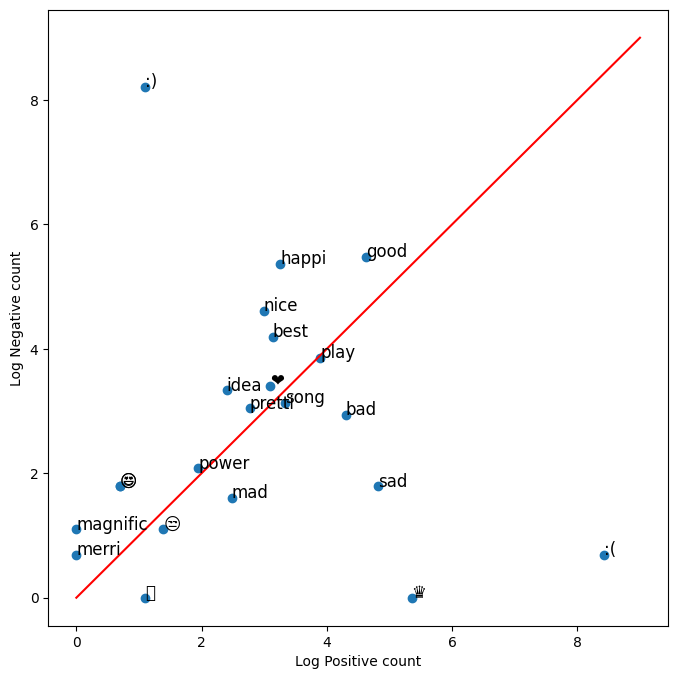

In [38]:
fig, ax = plt.subplots(figsize = (8, 8))
x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data]) 
ax.scatter(x, y)  
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red')
plt.show()